# Implementacion inicial de k means

### En esta implementacion para hacerlo mas grafico se trabaja siempre con 3 clusters y dos dimensiones

In [4]:
from sklearn.datasets import make_blobs
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
x, y = make_blobs(n_samples = 1000)

### Divide Data 
Dividimos el data set en los clusters dependiendo del valor de x

In [6]:
def divideData(x, y):
    x1 = np.array([x[i, :] for i in range(x.shape[0]) if y[i] == 0])
    x2 = np.array([x[i, :] for i in range(x.shape[0]) if y[i] == 1])
    x3 = np.array([x[i, :] for i in range(x.shape[0]) if y[i] == 2])
    return x1, x2, x3

### Funcion para enseñar el dataset o para enseñar el movimiento de los centroides y el cambio de color de los puntos

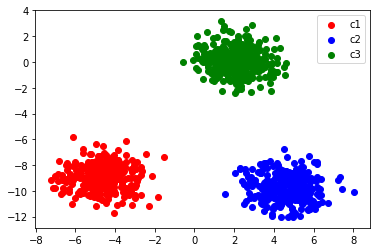

In [7]:
def show(x1, x2, x3, centroids = None):
    if x1.shape[0] != 0:
        plt.scatter(x1[:, 0], x1[:, 1], c="red", label = "c1")
    if x2.shape[0] != 0:
        plt.scatter(x2[:, 0], x2[:, 1], c="blue", label = "c2")
    if x2.shape[0] != 0:
        plt.scatter(x3[:, 0], x3[:, 1], c="green", label = "c3")
    if centroids is not None:
        plt.scatter(centroids[0, 0], centroids[0, 1], c="salmon", marker = "D", linewidths=5) 
        plt.scatter(centroids[1, 0], centroids[1, 1], c="cyan", marker = "D", linewidths=5) 
        plt.scatter(centroids[2, 0], centroids[2, 1], c="lime", marker = "D", linewidths=5)
    plt.legend()
    plt.show()
x1, x2, x3 = divideData(x, y)
show(x1, x2, x3)

### Algoritmo k means 

Primero asignamos los datos al centroide, luego movemos el centroide de lugar y 
repetimos esto hasta que no se perciba ningun cambio

In [70]:
from scipy.spatial import distance
from IPython.display import clear_output
import time

def calculateDistanceAndAssign(data, centroids):
    y = np.zeros(data.shape[0])
    for i, d in enumerate(data):
        y[i] = np.argmin(np.array([distance.euclidean(d, centroid) for centroid in centroids]))
    return y

def moveCentroid(x1, x2, x3):
    centroids = np.zeros((3, x1.shape[1]))
    centroids[0] = np.average(x1, axis = 0)
    centroids[1] = np.average(x2, axis = 0)
    centroids[2] = np.average(x3, axis = 0)
    return centroids
    
def k_means_2d(data, n_clusters):
    min_x = np.min(data[:, 0])
    max_x = np.max(data[:, 0])
    
    min_y = np.min(data[:, 1])
    max_y = np.max(data[:, 1])
    
    
    centroids = np.column_stack((
                np.random.uniform(low = min_x, high = max_x, size= (3,)),
                np.random.uniform(low = min_y, high = max_y, size= (3,))
                ))
    
    y = np.zeros(data.shape[0])
    changing = True
    while changing:
        y_new = calculateDistanceAndAssign(data, centroids)
        if np.array_equal(y, y_new):
           changing = False
        else:
            y = y_new
            print(y.shape)
            x1, x2, x3 = divideData(data, y)
            while x1.shape[0] == 0 or x2.shape[0] == 0 or x3.shape[0] == 0:
                print("empty_cluster!")
                centroids = np.column_stack((
                np.random.uniform(low = min_x, high = max_x, size= (3,)),
                np.random.uniform(low = min_y, high = max_y, size= (3,))
                ))
                y = calculateDistanceAndAssign(data, centroids)
                x1, x2, x3 = divideData(data, y)
                    

                    
            show(x1, x2, x3, centroids = centroids)

            
            clear_output(wait = True)
            time.sleep(0.5)
        centroids = moveCentroid(x1, x2, x3)
    show(x1, x2, x3, centroids = centroids)
  


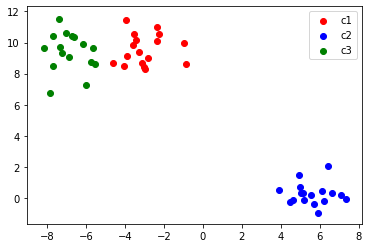

In [51]:
x, y = make_blobs(n_samples = 50)  
x1, x2, x3 = divideData(x, y)
show(x1, x2, x3)

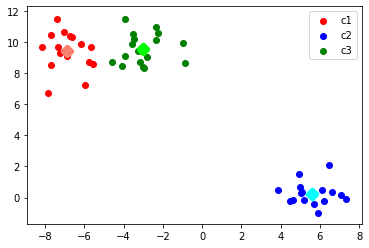

In [72]:
k_means_2d(x, 3)

In [11]:
#
#
#
#
#
#
#
#
#
#
#
#